# **Loading the Training Dataset**
*Author: OJotham*

In [1]:
import os
import pandas as pd 

home_folder = os.path.expanduser("~")
data_folder = os.path.join(home_folder, "Documents","ClassificationChallenge","challenge1_HowCrispCanYouClassify", "data")
iris_train = os.path.join(data_folder, "iris_train.csv")
print(data_folder)

C:\Users\Jotham\Documents\ClassificationChallenge\challenge1_HowCrispCanYouClassify\data


# ** Data Exploration and Visualization**

In [2]:
results = pd.read_csv(iris_train)
results.iloc[:5]


,Unnamed: 0,0,1,2,3,labels
0,0,6.3,2.9,5.6,1.8,Iris-virginica
1,1,5.6,3.0,4.5,1.5,Iris-versicolor
2,2,7.9,3.8,6.4,2.0,Iris-virginica
3,3,6.5,2.8,4.6,1.5,Iris-versicolor
4,4,5.0,2.0,3.5,1.0,Iris-versicolor


In [3]:
results.plot.scatter('0','1')

C:\Users\Jotham\Miniconda3\Lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  


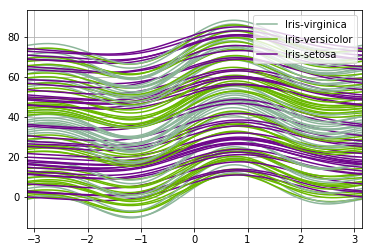

In [4]:
from pandas.tools.plotting import andrews_curves
andrews_curves(results, 'labels')

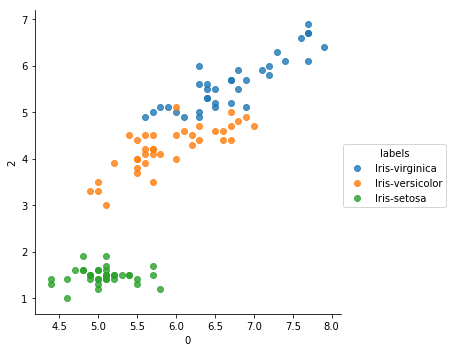

In [5]:
import seaborn as sns
sns.lmplot('0', '2', results, hue = 'labels', fit_reg = False)

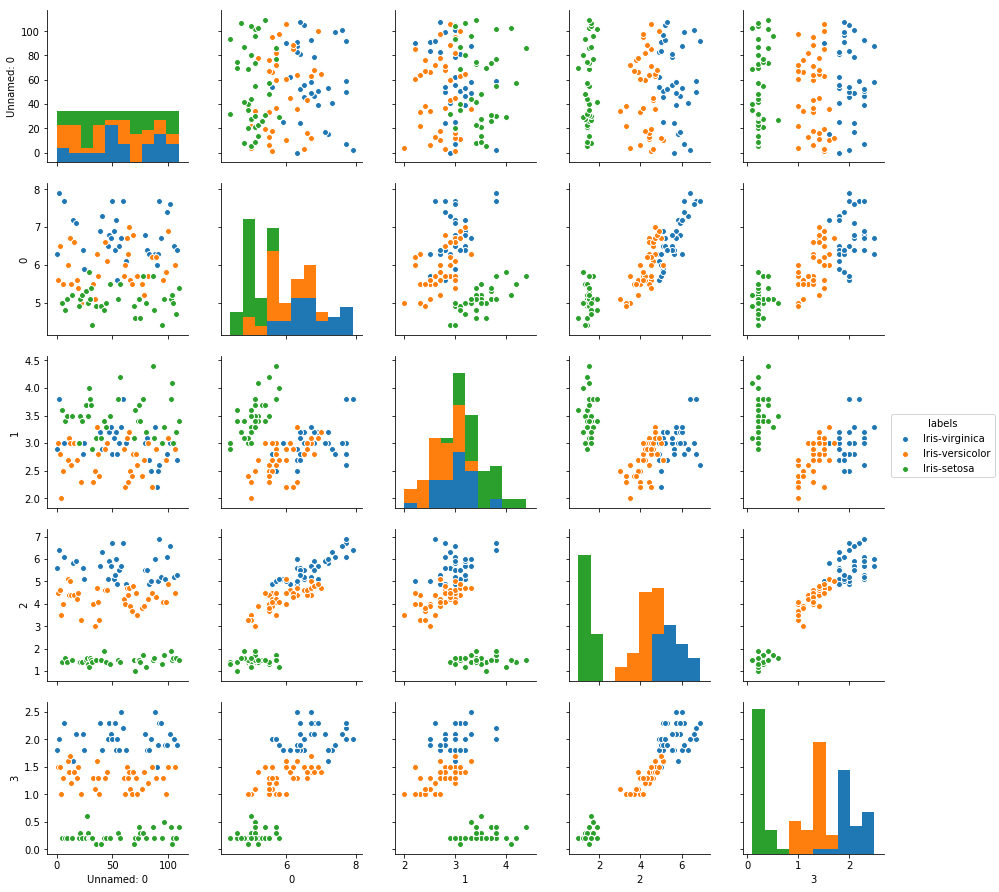

In [6]:
sns.pairplot(results, hue = 'labels')

In [7]:
results.describe()

,Unnamed: 0,0,1,2,3
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,54.500000,5.883636,3.064545,3.753636,1.176364
std,31.898276,0.852361,0.457473,1.781128,0.753698
min,0.000000,4.400000,2.000000,1.000000,0.100000
25%,27.250000,5.100000,2.800000,1.600000,0.300000
50%,54.500000,5.700000,3.000000,4.250000,1.300000
75%,81.750000,6.500000,3.300000,5.100000,1.800000
max,109.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
results['labels'] = results['labels'].astype('category')
cat_columns = results.select_dtypes(['category']).columns
results[cat_columns] = results[cat_columns].apply(lambda x: x.cat.codes)
results.iloc[:10]

,Unnamed: 0,0,1,2,3,labels
0,0,6.3,2.9,5.6,1.8,2
1,1,5.6,3.0,4.5,1.5,1
2,2,7.9,3.8,6.4,2.0,2
3,3,6.5,2.8,4.6,1.5,1
4,4,5.0,2.0,3.5,1.0,1
5,5,5.0,3.6,1.4,0.2,0
6,6,5.5,2.5,4.0,1.3,1
7,7,7.7,3.0,6.1,2.3,2
8,8,4.8,3.4,1.6,0.2,0
9,9,5.1,3.5,1.4,0.2,0


## creating the training target set

In [9]:
x = results.drop(results.columns[[0,5]], axis = 1)
#x.iloc[:5]
y = results['labels']
#y.iloc[:5]

## Instantiating the SVM Classifier and carrying out the prediction

In [10]:
from sklearn.svm import SVC

#Creating an SVC object
svm_clf = SVC()
#train the classifier
svm_clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
#load the test data
iris_test = os.path.join(data_folder, "iris_test.csv")
test_values = pd.read_csv(iris_test)
test_values = test_values.drop(test_values.columns[[0]], axis = 1)
#call the predict method
svm_results  = svm_clf.predict(test_values)
print(svm_results)
svm_result = list(map(str,test_results))
print(svm_result)

[2 0 0 0 1 1 0 2 1 2 1 2 2 1 1 0 2 2 2 2 0 0 0 2 0 2 0 1 2 2 1 2 0 0 1 1 1
 2 1 0]
['2', '0', '0', '0', '1', '1', '0', '2', '1', '2', '1', '2', '2', '1', '1', '0', '2', '2', '2', '2', '0', '0', '0', '2', '0', '2', '0', '1', '2', '2', '1', '2', '0', '0', '1', '1', '1', '2', '1', '0']


In [14]:
svm_score = svm_clf.score(x,y)
print("The Support Vector Machines algorithm achieved an accuracy of {:.2f} % on the training dataset".format(svm_score*100))

The Support Vector Machines algorithm achieved an accuracy of 98.18 % on the training dataset


## Using Naive-Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(x,y)
nb_results = nb_clf.predict(test_values)
print(nb_results)

[2 0 0 0 1 1 0 2 1 2 1 2 2 1 1 0 2 2 2 2 0 0 0 1 0 2 0 1 1 2 1 2 0 0 1 1 1
 2 1 0]


In [16]:
nb_score = nb_clf.score(x,y)
print("The Naive-Bayes algorithm achieved an accuracy of {:.2f} % on the training dataset".format(nb_score*100))

The Naive-Bayes algorithm achieved an accuracy of 98.18 % on the training dataset


## Using KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x,y)
knn_results = knn_clf.predict(test_values)
print(knn_results)

[2 0 0 0 1 2 0 1 1 2 1 2 2 1 1 0 2 2 2 2 0 0 0 2 0 2 0 1 2 2 1 2 0 0 1 1 1
 2 1 0]


In [18]:
knn_score = knn_clf.score(x,y)
print("The KNeighborsClassifier algorithm achieved an accuracy of {:.2f} % on the training dataset".format(knn_score*100))

The KNeighborsClassifier algorithm achieved an accuracy of 99.09 % on the training dataset


## Using DecisionTrees

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(criterion = 'gini')
dtree_clf.fit(x,y)
dtree_results = dtree_clf.predict(test_values)
print(dtree_results)
dtree_result = list(map(str, dtree_results))

[2 0 0 0 1 1 0 2 1 2 1 2 2 1 1 0 2 2 2 2 0 0 0 1 0 2 0 1 2 2 1 2 0 0 1 1 1
 2 1 0]


In [21]:
dtree_score = dtree_clf.score(x,y)
print("The Decision Trees algorithm achieved an accuracy of {:.2f} % on the training dataset".format(dtree_score*100))

The Decision Trees algorithm achieved an accuracy of 100.00 % on the training dataset


In [24]:
for i in range(len(dtree_results)):
    if dtree_results[i] == 0:
      #      print("Iris-setosa")
        dtree_result[i] = "Iris-setosa"
    elif dtree_results[i] == 1:
      #      print("Iris-versicolor")
        dtree_result[i] = "Iris-versicolor"
    elif dtree_results[i] == 2:
      #      print("Iris-virginica")
        dtree_result[i] = "Iris-virginica"
    
    
dtree_rsts = pd.DataFrame(dtree_result)
dtree_rsts.columns = ["label"]
dtree_rsts.to_csv("iris_test_labelled.csv")